# Stratified K Fold cross-validation

Using KNN dataset to implement stratified K Fold cross-validation 

In [135]:
import numpy as np
import matplotlib.pyplot as plt
# from os.path  import join
import pandas as pd
from sklearn.model_selection import StratifiedKFold, KFold

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
# read in the iris data
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42, stratify=y)

#stratify=y random_state=42
# knn = KNeighborsClassifier(n_neighbors=5)

# knn.fit(X, y)
# y_pred = knn.predict(X)
# print(metrics.accuracy_score(y, y_pred))

print(y_test.shape)

(50,)


In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(X, y)
k_choices = sorted([1, 3, 5, 8, 10, 12, 15, 20, 50])

k_accuracy = {}
count = 0

for k in k_choices:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    accuracy = []
    for train_index, val_index in skf.split(X_train, y_train):
        print("TRAIN:", train_index, "TEST:", val_index)
        X_tr, X_val = X[train_index], X[val_index]
        y_tr, y_val = y[train_index], y[val_index]
        
        knn.fit(X_tr, y_tr)
        y_pred = knn.predict(X_val)
        
        accuracy.append(metrics.accuracy_score(y_val, y_pred))
    k_accuracy[k] = accuracy
    
print(k_accuracy)

TRAIN: [24 28 30 35 36 37 38 39 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81
 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 29 31 32 33 34 40 41]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 29 31 32 33 34 40 41 66 67 69 70 71 72 73 74 75 76 77 78 79 80
 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] TEST: [24 28 30 35 36 37 38 39 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 68]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 68] TEST: [66 67 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 91 92 93 94 95 96 97 98 99]
TRAIN: [24 28 30 35 36 37 38 39 42 43 44

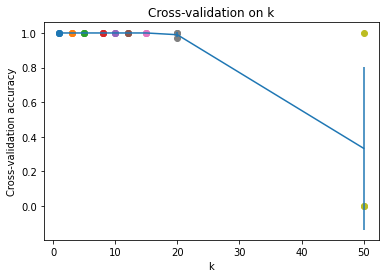

In [162]:
# plot the raw observations
for k in k_choices:
    accuracies = k_accuracy[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_accuracy.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_accuracy.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [157]:
# Based on the cross-validation results above, choose the best value for k
best_k = k_choices[np.argmax(accuracies_mean)]
print("Best k is:",best_k)
print("Cross validation accuracy:",np.max(accuracies_mean))

Best k is: 1
Cross validation accuracy: 0.6841016548463356


## Report the final results on test data

In [154]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7323943661971831


In [104]:
# def stratfied_split(X,y,num_split):
    

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_13192/3951451809.py, line 2)

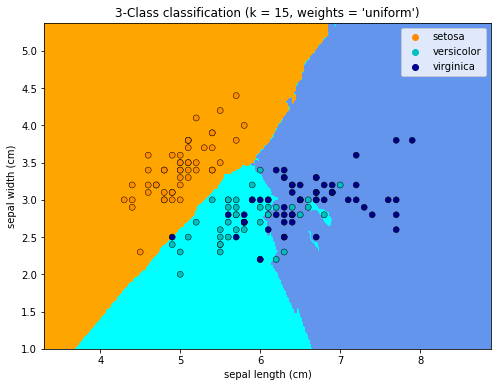

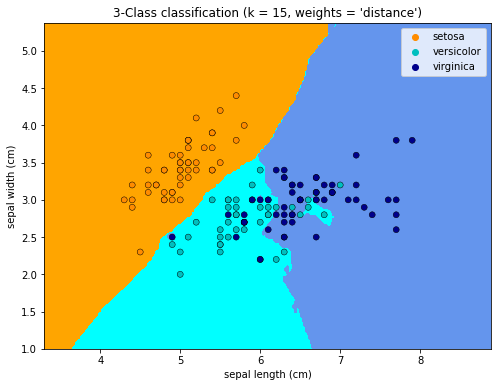

In [145]:
from matplotlib.colors import ListedColormap
import seaborn as sns

n_neighbors = 15

X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()